# <font color=#14F278>Unit 9 - Time Series in Pandas</font>
---

## <font color=#14F278>1. Time Series - Definition:</font>

A <font color=#14F278>**Time Series**</font> is a <font color=#14F278>**sequence of data points that occur in a successive order over a time period**</font>.
- The concept of Time Series plays a central role in many fields of science- it allows us to understand a temporal dataset, explore its features and data fluctuations over time, and unlitamely, conduct all sorts of statistical and predictive analysis
- Intuitively, a <font color=#14F278>**Time Series of a variable**</font> is a collection of discrete observations for that variable, made over a continuous time period
- Below is an example of a Time Series line chart, depicting stock price movement over the months in a year:

<center>
    <div>
        <img src="..\images\timeseries_001.png"/>
    </div>
</center>

In Pandas, a <font color=#14F278>**Time Series**</font> is simply a <font color=#14F278>**Series object, indexed by time**</font>. Typically Time Series contain numerical data.

---
## <font color=#14F278>2. Introduction to `YahooFinancials`:</font>

Time Series are often used with <font color=#14F278>**financial data**</font>:
- In this unit, we will be working with `yahoofinancials` - a powerful financial data module, used for pulling both financial and technical data from Yahoo Finance.
- <font color=#14F278>**Yahoo Finance**</font> have large datasets of historical financial information on publicly traded companies such as stock prices, stock betas (measuring volatility of a stock), and others.
- If you haven't worked with `yahoofinancials`, ensure to `pip install` it
- For more details on `yahoofinancials` visit https://pypi.org/project/yahoofinancials/


In [1]:
import yahoofinancials
from yahoofinancials import YahooFinancials
import pandas as pd
import numpy as np

---
### <font color=#14F278>2.1 `YahooFinancials` - Apple Price Data:</font>

- Let's import the daily historic price data for Apple for the period 2019-2020 and explore the structure of the data:
- we will initialise a `YahooFinancials()` object, passing a company ticker as its argument - here this is `'AAPL'`
- use the `get_historic_price_data()` method to obtain price information on the company's stock

In [2]:
# Import financial data on Apple (AAPL) 
# We use .get_historical_price_data(start_date, end_date, time_interval) to pull daily prices of Apple stocks 
data = YahooFinancials('AAPL').get_historical_price_data('2019-01-01', '2020-01-01', 'daily')
data

{'AAPL': {'eventsData': {'dividends': {'2019-02-08': {'amount': 0.1825,
     'date': 1549636200,
     'formatted_date': '2019-02-08'},
    '2019-05-10': {'amount': 0.1925,
     'date': 1557495000,
     'formatted_date': '2019-05-10'},
    '2019-08-09': {'amount': 0.1925,
     'date': 1565357400,
     'formatted_date': '2019-08-09'},
    '2019-11-07': {'amount': 0.1925,
     'date': 1573137000,
     'formatted_date': '2019-11-07'}}},
  'firstTradeDate': {'formatted_date': '1980-12-12', 'date': 345479400},
  'currency': 'USD',
  'instrumentType': 'EQUITY',
  'timeZone': {'gmtOffset': -18000},
  'prices': [{'date': 1546439400,
    'high': 39.712501525878906,
    'low': 38.557498931884766,
    'open': 38.72249984741211,
    'close': 39.47999954223633,
    'volume': 148158800,
    'adjclose': 37.84504699707031,
    'formatted_date': '2019-01-02'},
   {'date': 1546525800,
    'high': 36.43000030517578,
    'low': 35.5,
    'open': 35.994998931884766,
    'close': 35.54750061035156,
    'volu

<font color=#FF8181>**Important:**</font> The `data` object is in <font color=#FF8181>**JSON**</font> format:
- <font color=#14F278>**JSON (JavaScript Object Notation)**</font> is a file format that uses human-readable text to store and transmit data objects (usually from a server to a web page).
- The data consists of attribute-value pairs
- The main building blocks of a JSON file are <font color=#14F278>**list and dictionary objects**</font>.

In [3]:
# What object data type is the data?
# What about data['AAPL']?
data['AAPL']

{'eventsData': {'dividends': {'2019-02-08': {'amount': 0.1825,
    'date': 1549636200,
    'formatted_date': '2019-02-08'},
   '2019-05-10': {'amount': 0.1925,
    'date': 1557495000,
    'formatted_date': '2019-05-10'},
   '2019-08-09': {'amount': 0.1925,
    'date': 1565357400,
    'formatted_date': '2019-08-09'},
   '2019-11-07': {'amount': 0.1925,
    'date': 1573137000,
    'formatted_date': '2019-11-07'}}},
 'firstTradeDate': {'formatted_date': '1980-12-12', 'date': 345479400},
 'currency': 'USD',
 'instrumentType': 'EQUITY',
 'timeZone': {'gmtOffset': -18000},
 'prices': [{'date': 1546439400,
   'high': 39.712501525878906,
   'low': 38.557498931884766,
   'open': 38.72249984741211,
   'close': 39.47999954223633,
   'volume': 148158800,
   'adjclose': 37.84504699707031,
   'formatted_date': '2019-01-02'},
  {'date': 1546525800,
   'high': 36.43000030517578,
   'low': 35.5,
   'open': 35.994998931884766,
   'close': 35.54750061035156,
   'volume': 365248800,
   'adjclose': 34.0753

In [4]:
# What are the keys of the dictionary data['AAPL']
data['AAPL'].keys()

dict_keys(['eventsData', 'firstTradeDate', 'currency', 'instrumentType', 'timeZone', 'prices'])

In [5]:
# What is the structure of data['AAPL']['prices']
data['AAPL']['prices']

[{'date': 1546439400,
  'high': 39.712501525878906,
  'low': 38.557498931884766,
  'open': 38.72249984741211,
  'close': 39.47999954223633,
  'volume': 148158800,
  'adjclose': 37.84504699707031,
  'formatted_date': '2019-01-02'},
 {'date': 1546525800,
  'high': 36.43000030517578,
  'low': 35.5,
  'open': 35.994998931884766,
  'close': 35.54750061035156,
  'volume': 365248800,
  'adjclose': 34.07539749145508,
  'formatted_date': '2019-01-03'},
 {'date': 1546612200,
  'high': 37.13750076293945,
  'low': 35.95000076293945,
  'open': 36.13249969482422,
  'close': 37.064998626708984,
  'volume': 234428400,
  'adjclose': 35.53004837036133,
  'formatted_date': '2019-01-04'},
 {'date': 1546871400,
  'high': 37.20750045776367,
  'low': 36.474998474121094,
  'open': 37.17499923706055,
  'close': 36.98249816894531,
  'volume': 219111200,
  'adjclose': 35.45097732543945,
  'formatted_date': '2019-01-07'},
 {'date': 1546957800,
  'high': 37.95500183105469,
  'low': 37.130001068115234,
  'open': 37

In [6]:
# Let's feed the Apple prices in a DataFrame object
# Luckily, pd.DataFrame() accepts all sorts of list-dictionary combinations
# We can directly pass data['AAPL']['prices'] inside the function to produce a DataFrame
prices = pd.DataFrame(data['AAPL']['prices'])
prices.head()

,date,high,low,open,close,volume,adjclose,formatted_date
0,1546439400,39.712502,38.557499,38.722500,39.480000,148158800,37.845047,2019-01-02
1,1546525800,36.430000,35.500000,35.994999,35.547501,365248800,34.075397,2019-01-03
2,1546612200,37.137501,35.950001,36.132500,37.064999,234428400,35.530048,2019-01-04
3,1546871400,37.207500,36.474998,37.174999,36.982498,219111200,35.450977,2019-01-07
4,1546957800,37.955002,37.130001,37.389999,37.687500,164101200,36.126762,2019-01-08


---
### <font color=#14F278>2.2 Apple Price Data - ETL:</font>
<font color=#14F278>**ETL (Extract, Transform, Load)**</font> is a tipical procedure when analysing data:
- We extracted the data from YahooFinancials and loaded it in the a DataFrame object
- Let's perform the following simple steps:
    - Drop unnecessary columns
    - Convert column `'formatted_date'` into an actual **date object**
    - Set the index of the DataFrame to `'formatted_date'`

<font color=#FF8181>**Question:**</font> What is the `prices` DataFrame a collection of?


In [7]:
# Drop columns
prices.drop(columns = ['date', 'volume'], inplace = True)

# Convert 'formatted_date' into a datetime object
prices['formatted_date'] = pd.to_datetime(prices['formatted_date'])

# Reset index to be our date column
prices.set_index('formatted_date', inplace = True)

# Take a peak
prices.head()

,high,low,open,close,adjclose
formatted_date,,,,,
2019-01-02,39.712502,38.557499,38.722500,39.480000,37.845047
2019-01-03,36.430000,35.500000,35.994999,35.547501,34.075397
2019-01-04,37.137501,35.950001,36.132500,37.064999,35.530048
2019-01-07,37.207500,36.474998,37.174999,36.982498,35.450977
2019-01-08,37.955002,37.130001,37.389999,37.687500,36.126762


---
## <font color=#14F278>3. Time Series - Resampling:</font>
<font color=#14F278>**Resampling**</font> is the process of changing the frequency (sampling rate) of observations in a Time Series:
- <font color=#14F278>**Downsampling**</font> is the process of <font color=#14F278>**reducing**</font> the sampling rate - e.g., downsampling from **daily** to **monthly** observations
- <font color=#14F278>**Upsampling**</font> is the process of <font color=#14F278>**expanding**</font> the sampling rate - e.g., upsampling from **yearly** to **monthly** observations

\
\
In Pandas, both up- and downsampling are performed with via the `resample()` method:
- it accepts a single argument, denoting the **frequency**
- it is followed by an **aggregation function** 
- the use of an aggregation function is syntactically needed regardless of the type of resampling we perform

Syntax:
- `df.resample('frequency').aggregation_function()` where `frequency = M, D, etc.` 


In [8]:
# Downsample daily data to monthly. (Index needs to be a date index)
# Resulting DataFrame has only one record per month and all column values are the monthly averages
prices_m = prices.resample('M').mean()
prices_m

C:\Users\MaxBeck\AppData\Local\Temp\ipykernel_16572\2990265989.py:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  prices_m = prices.resample('M').mean()


,high,low,open,close,adjclose
formatted_date,,,,,
2019-01-31,38.882619,37.986905,38.402143,38.541548,36.945452
2019-02-28,43.220395,42.632895,42.848027,42.931973,41.284195
2019-03-31,46.232976,45.352738,45.805953,45.823453,44.114185
2019-04-30,50.394286,49.657738,49.966666,50.129048,48.259177
2019-05-31,48.342386,47.301250,47.734659,47.818409,46.151075
2019-06-30,48.699000,47.808250,48.166125,48.242250,46.621611
2019-07-31,51.682386,50.978523,51.262954,51.304091,49.580593
2019-08-31,51.902386,50.712386,51.315568,51.239432,49.655958
2019-09-30,54.867750,53.984875,54.431875,54.498750,52.868039


In [9]:
# Upsample monthly data to daily - lost granularity for the data
prices_m_d = prices_m.resample('D').mean()
display(prices_m_d)

,high,low,open,close,adjclose
formatted_date,,,,,
2019-01-31,38.882619,37.986905,38.402143,38.541548,36.945452
2019-02-01,NaN,NaN,NaN,NaN,NaN
2019-02-02,NaN,NaN,NaN,NaN,NaN
2019-02-03,NaN,NaN,NaN,NaN,NaN
2019-02-04,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...
2019-12-27,NaN,NaN,NaN,NaN,NaN
2019-12-28,NaN,NaN,NaN,NaN,NaN
2019-12-29,NaN,NaN,NaN,NaN,NaN


In [10]:
# What happens is, we created a bunch of NaN rows in the DataFrame
# Let's handle missing data using linear interpolation
prices_m_d.interpolate().head(10)

,high,low,open,close,adjclose
formatted_date,,,,,
2019-01-31,38.882619,37.986905,38.402143,38.541548,36.945452
2019-02-01,39.037540,38.152833,38.560924,38.698348,37.100407
2019-02-02,39.192461,38.318761,38.719706,38.855149,37.255362
2019-02-03,39.347381,38.484689,38.878487,39.011950,37.410317
2019-02-04,39.502302,38.650618,39.037269,39.168751,37.565272
2019-02-05,39.657222,38.816546,39.196051,39.325552,37.720227
2019-02-06,39.812143,38.982474,39.354832,39.482353,37.875182
2019-02-07,39.967063,39.148402,39.513614,39.639154,38.030138
2019-02-08,40.121984,39.314330,39.672395,39.795955,38.185093


<Axes: xlabel='formatted_date'>

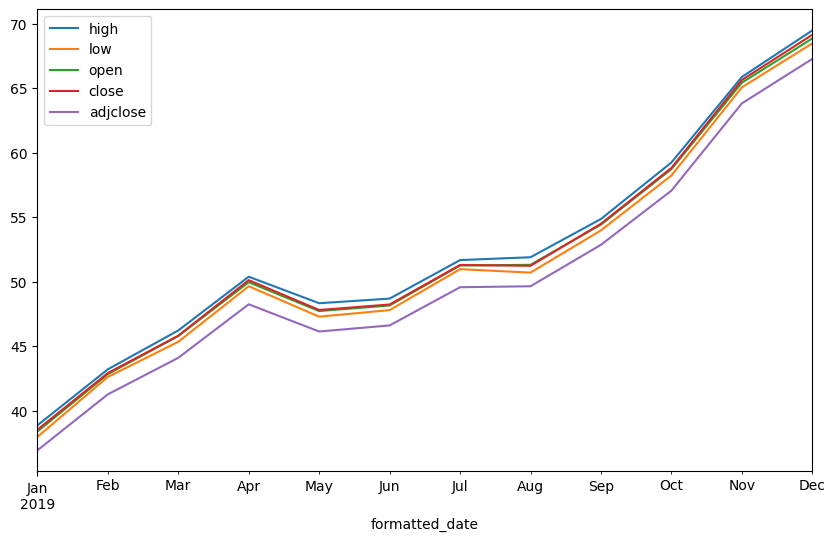

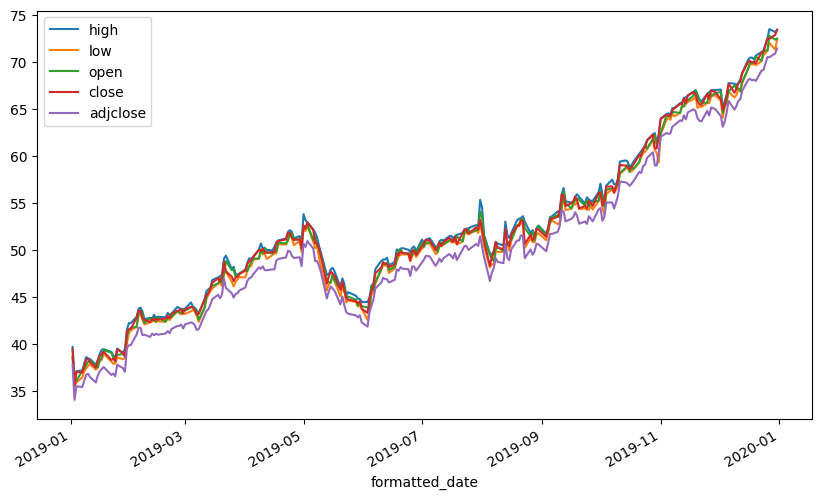

In [12]:
# Finally, let's plot the time series
prices_m.plot(figsize = (10,6))
prices.plot(figsize = (10,6))

---
## <font color=#14F278>4. Time Series - Rolling Statistics:</font>

A <font color=#14F278>**Rolling Statistic**</font> is a a statistic, calculated on the observations from a <font color=#14F278>**moving time window**</font>:
- One popular rolling statistic is the <font color=#14F278>**Moving Average (MA)**</font>
- At any point in time, the MA takes the average of the last X observations
- A typical value for X is 30 - this is when you perform a <font color=#14F278>**monthly MA**</font>
- When performed on a Time Series, MA also returns a Time Series object, containing the moving averages
- In Pandas, we calculate rolling statistics via the `rolling()` method
- Syntax: `series.rolling(X).aggregation_function` where `X = number of observations` 


In [14]:
# Let's create a MA30 for the adjusted close price of the Apple stock
# We will store the averages in the prices dataframe
prices['adjclose_ma30'] = prices['adjclose'].rolling(30).mean()
prices.tail()       # How many observations are missing in the beginning and why?

,high,low,open,close,adjclose,adjclose_ma30
formatted_date,,,,,,
2019-12-24,71.222504,70.730003,71.172501,71.067497,69.147980,65.539907
2019-12-26,72.495003,71.175003,71.205002,72.477501,70.519928,65.766533
2019-12-27,73.492500,72.029999,72.779999,72.449997,70.493149,65.971916
2019-12-30,73.172501,71.305000,72.364998,72.879997,70.911545,66.206082
2019-12-31,73.419998,72.379997,72.482498,73.412498,71.429665,66.432221


---
## <font color=#14F278>5. Time Series - Other Methods:</font>

Time Series in Pandas have many other interesting methods, such as:
- <font color=#14F278>**Shifting (Lagging)**</font> a Time Series by a time period - `shift()`
- Calculating the <font color=#14F278>**Percentage Change**</font> between values in a Time Series - `pct_change()`
- <font color=#14F278>**Differencing**</font> a Time Series - taking the difference between consecutive values of a Time Series - `diff()`


<center>
    <div>
        <img src="..\images\timeseries_002.png"/>
    </div>
</center>

In [15]:
# Create a Series
s = prices['adjclose'].head(10).copy()
print('Initial Series:',s)

Initial Series: formatted_date
2019-01-02    37.845047
2019-01-03    34.075397
2019-01-04    35.530048
2019-01-07    35.450977
2019-01-08    36.126762
2019-01-09    36.740269
2019-01-10    36.857689
2019-01-11    36.495827
2019-01-14    35.947029
2019-01-15    36.682755
Name: adjclose, dtype: float64


In [20]:
# Shift the Series by 1 Period in Time
print('Shifted Series:',s.shift(1))

Shifted Series: formatted_date
2019-01-02          NaN
2019-01-03    37.845047
2019-01-04    34.075397
2019-01-07    35.530048
2019-01-08    35.450977
2019-01-09    36.126762
2019-01-10    36.740269
2019-01-11    36.857689
2019-01-14    36.495827
2019-01-15    35.947029
Name: adjclose, dtype: float64


In [17]:
# Take Percentage Change
print('% Change of Series:', s.pct_change())

% Change of Series: formatted_date
2019-01-02         NaN
2019-01-03   -0.099607
2019-01-04    0.042689
2019-01-07   -0.002225
2019-01-08    0.019063
2019-01-09    0.016982
2019-01-10    0.003196
2019-01-11   -0.009818
2019-01-14   -0.015037
2019-01-15    0.020467
Name: adjclose, dtype: float64


In [18]:
# Take First Difference of a series
print('First Difference of a Series:', s.diff(1))

First Difference of a Series: formatted_date
2019-01-02         NaN
2019-01-03   -3.769650
2019-01-04    1.454651
2019-01-07   -0.079071
2019-01-08    0.675785
2019-01-09    0.613506
2019-01-10    0.117420
2019-01-11   -0.361862
2019-01-14   -0.548798
2019-01-15    0.735725
Name: adjclose, dtype: float64


---
## <font color=#14F278>6. Summary:</font>
- A __Time Series__ is a sequence of data points that occur in successive order over a time period
- In Pandas, every numerical Series with a __Datetime Index__ can be viewed as a Time Series
- Time Series allows us to perform operations such as:
     - Resampling - `.resample()`
     - Rolling Statistics - `.rolling()`
     - Plotting Timelines - `.plot()`
     - Lagging, taking percentage changes and differencing - `.shift()`, `.pct_change()`, `.diff()`

---
## <font color=#FF8181> 7. Concept Check: </font>

1. What is a __Time Series__? Explain in simple words the difference between a Pandas Series Object and a Time Series
2. Suppose we have a Time Series, containing a full year worth of observations on variable __X__ (that is 365 daily observations):
- What is the output produced by `.resample('M').mean()` - explain the concept of downsampling
- What is the output produced by `.resample('D').mean()` - explain the concept of upsampling
- After resampling to the initial frequency of observation (daily) what can you say about the majority of values in our Time Series. How could you best tackle them? What is the main difference between the initial Time Series and the final Time Series you have produced?

In [ ]:
#1 A time series is a sequence of data poitns that occur in a successive order over a time period.
# Each observation is indexed (uniquely identified) by the moment in time it took place. 
# In that sense, a Pandas Series Object with index of type DataTime is a Time Series

In [21]:
#2a) it downscales the sampling rate so entries would only be monthly - 12 elements
#b) it increases the sampling rate so entries are on a daily basis - 365 elemebts
#c) a lot of the values would be "lost" and replaces with nan. This could be solved
# with interpolatino ebtween the existing values. These interpolated values may be different
# to the values in the original df (smoothed out)